<a href="https://colab.research.google.com/github/McyRoyAl/data_processing/blob/main/data_rep%26proc_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
from PIL import Image
import io, math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def array_to_image(array, resize = None):
  """Utility function for printing an array as an image."""
  image = Image.fromarray(np.clip(array * 256, 1, 255).astype(np.uint8))
  return image.resize((resize, resize), resample=0) if resize else image

In [ ]:
def image_to_array(image):
  """Utility function for representing an image as a numpy array."""
  return (np.array(image) + 0.5) / 256

In [ ]:
def tile_images(images, columns=4, margin=64, right_margin=0):
  """Generate a tiled grid containing all of the images.
  (Assume all images are the same size.)"""
  arr = list(map(lambda image: np.array(image), images))
  rows = math.ceil(len(arr) / columns)
  columns = len(arr[:columns])  # real columns (less than param if rows is 1)
  height = arr[0].shape[0] * rows + margin * (rows - 1)
  width = arr[0].shape[1] * columns + margin * (columns - 1) + right_margin
  tiled = np.ones((height, width)).astype(np.uint8) * 255
  for idx in range(len(arr)):
    i = int(idx / columns); j = idx % columns
    x = i * (arr[0].shape[0] + margin); y = j * (arr[0].shape[1] + margin)
    tiled[x: x + arr[0].shape[0], y: y + arr[0].shape[1]] = arr[idx]
  return Image.fromarray(tiled)

# Theory

Compute the DFT representation of each row of an image degraded by additive harmonic noise with fixed frequency but random iid amplitude and phase per row: $I_{i, j}^{n o i s y}=I+A_{i} \cos \left(2 \pi f j+\varphi_{i}\right)$, where $\frac{1}{f}$ divides $n$ the number of columns in the image. Provide a theoretical derivation.

\begin{align*}
    I^F_i &= \left[DFT\right] \left(I_i + \boldsymbol{A}_i \cos\left(2 \pi f \boldsymbol{j} + \boldsymbol{\varphi}_i \right)\right) \\
    &= \left[DFT\right] I_i + \boldsymbol{A}_i \left[DFT\right] \cos\left(2 \pi f \boldsymbol{j} + \boldsymbol{\varphi}_i \right) \\
    &= \left[DFT\right] I_i + \boldsymbol{A}_i \cos\left(\boldsymbol{\varphi}_i\right) \left[DFT\right] \cos\left(2 \pi f \boldsymbol{j}\right) - \boldsymbol{A}_i \sin\left(\boldsymbol{\varphi}_i\right) \left[DFT\right] \sin\left(2 \pi f \boldsymbol{j}\right) \\
    &= \left[DFT\right] I_i + \boldsymbol{A}_i \cos\left(\boldsymbol{\varphi}_i\right) \sum_{j=0}^{n-1}{\exp\left(\frac{-2 \pi i}{n}(i)(j)\right) \cos\left(2 \pi f j\right)} \\
    &\hspace{5.15em}- \boldsymbol{A}_i \sin\left(\boldsymbol{\varphi}_i\right) \sum_{j=0}^{n-1}{\exp\left(\frac{-2 \pi i}{n}(i)(j)\right) \sin\left(2 \pi f \boldsymbol{j}\right)} \\
    &= \left[DFT\right] I_i + \boldsymbol{A}_i \cos\left(\boldsymbol{\varphi}_i\right) \sum_{j=0}^{n-1}{\left(\cos\left(\frac{2 \pi }{n}(i)(j)\right) - i \sin\left(\frac{2 \pi }{n}(i)(j)\right)\right) \cos\left(2 \pi f j\right)} \\
    &\hspace{5.15em}- \boldsymbol{A}_i \sin\left(\boldsymbol{\varphi}_i\right) \sum_{j=0}^{n-1}{\left(\cos\left(\frac{2 \pi }{n}(i)(j)\right) - i \sin\left(\frac{2 \pi }{n}(i)(j)\right)\right) \sin\left(2 \pi f j\right)} \\
    &= \left[DFT\right] I_i + \frac{\boldsymbol{A}_i}{2} \cos\left(\boldsymbol{\varphi}_i\right) \sum_{j=0}^{n-1}{\left(\exp\left(\frac{-2 \pi i}{n} j \left(i + nf\right)\right) + \exp\left(\frac{-2 \pi i}{n} j \left(i - nf\right)\right)\right)} \\
    &\hspace{5.15em}- i \frac{\boldsymbol{A}_i}{2} \sin\left(\boldsymbol{\varphi}_i\right) \sum_{j=0}^{n-1}{\left(\exp\left(\frac{-2 \pi i }{n} j \left(i + nf\right)\right) - \exp\left(\frac{-2 \pi i}{n} j \left(i - nf\right)\right) \right)} \\
    &= \left[DFT\right] I_i + \frac{\boldsymbol{A}_i}{2} \left(\cos\left(\boldsymbol{\varphi}_i\right) - i \sin\left(\boldsymbol{\varphi}_i\right)\right) \sum_{j=0}^{n-1}{\exp\left(2 \pi i \left(\frac{i + nf}{n}\right)\right)^j} \\
    &\hspace{5.15em}+ \frac{\boldsymbol{A}_i}{2} \left(\cos\left(\boldsymbol{\varphi}_i\right) + i \sin\left(\boldsymbol{\varphi}_i\right)\right) \sum_{j=0}^{n-1}{\exp\left(2 \pi i \left(\frac{i - nf}{n}\right)\right)^j} \\
    &= \left[DFT\right] I_i + \frac{\boldsymbol{A}_i}{2} \exp\left(-i\boldsymbol{\varphi}_i\right) \begin{cases}n & \frac{i + nf}{n} \in \mathbb{Z} \\ 0 & \frac{i + nf}{n} \notin \mathbb{Z} \end{cases} + \frac{\boldsymbol{A}_i}{2} \exp\left(i\boldsymbol{\varphi}_i\right) \begin{cases}n & \frac{i - nf}{n} \in \mathbb{Z} \\ 0 & \frac{i - nf}{n} \notin \mathbb{Z} \end{cases} \\
    &= \left[DFT\right] I_i + \frac{n\boldsymbol{A}_i}{2} \exp\left(-i\boldsymbol{\varphi}_i\right) \begin{cases}1 & i = n\left(1-f\right) \\ 0 & i \ne n\left(1-f\right) \end{cases} + \frac{n\boldsymbol{A}_i}{2} \exp\left(i\boldsymbol{\varphi}_i\right) \begin{cases}1 & i = nf \\ 0 & i \ne nf \end{cases} \\
\end{align*}

Deduce the DFT representation of an image degraded by the weighted average of two different and independent harmonic noise vectors with different frequencies $\frac{1}{f_{1}}$ and $\frac{1}{f_{2}}$ both dividing $n$. Provide a theoretical derivation.

\begin{align*}
    I^F_i &= \left[DFT\right] \left(I_i + \boldsymbol{A}_i \cos\left(2 \pi f_1 \boldsymbol{j} + \boldsymbol{\varphi}_i \right) + \cos\left(2 \pi f_2 \boldsymbol{j} + \boldsymbol{\varphi}_i \right)\right) \\
    &= \left[DFT\right] I_i + \boldsymbol{A}_i \left[DFT\right] \cos\left(2 \pi f_1 \boldsymbol{j} + \boldsymbol{\varphi}_i \right) + \boldsymbol{A}_i \left[DFT\right] \cos\left(2 \pi f_2 \boldsymbol{j} + \boldsymbol{\varphi}_i \right) \\
    &= \left[DFT\right] I_i + \frac{n\boldsymbol{A}_i}{2} \exp\left(-i\boldsymbol{\varphi}_i\right) \begin{cases}1 & i = n\left(1-f\right) \\ 0 & i \ne n\left(1-f\right) \end{cases} + \frac{n\boldsymbol{A}_i}{2} \exp\left(i\boldsymbol{\varphi}_i\right) \begin{cases}1 & i = nf \\ 0 & i \ne nf \end{cases} \\
    &= \left[DFT\right] I_i + \frac{n\boldsymbol{A}_i}{2} \exp\left(-i\boldsymbol{\varphi}_i\right) \left( \begin{cases}1 & i = n\left(1 - f_1\right) \\ 0 & i \ne n\left(1 - f_1\right) \end{cases} + \begin{cases}1 & i = n\left(1 - f_2\right) \\ 0 & i \ne n\left(1 - f_2\right) \end{cases}\right) \\
    &\hspace{5.15em}+ \frac{n\boldsymbol{A}_i}{2} \exp\left(i\boldsymbol{\varphi}_i\right) \left( \begin{cases}1 & i = nf_1 \\ 0 & i \ne nf_1 \end{cases} + \begin{cases}1 & i = nf_2 \\ 0 & i \ne nf_2 \end{cases}\right) \\
\end{align*}

# Implementation

Load the image [bliss.png](https://i.imgur.com/y2khRcl.png) from the web.

Original image:



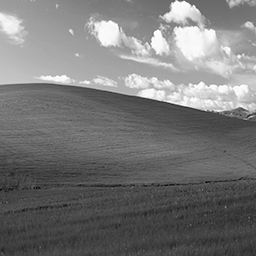

In [ ]:
urllib.request.urlretrieve("https://i.imgur.com/y2khRcl.png", "bliss.png")
image = Image.open("bliss.png")
image, _, _ = image.split()  # we only need one component
assert(len(image.histogram()) == 256)
print("Original image:\n")
display(image)

In [ ]:
# represent image as array
array = image_to_array(image)

In [ ]:
# define constants
N = 256
f1 = 1 / 8
f2 = 1 / 32

## Adding Noise

In [ ]:
def noise(f):
  """Generate random noise with frequency f."""
  A = np.reshape(np.random.standard_normal(N) * 0.05 + 0.1, (N, 1))
  p = np.reshape(np.random.rand(N) * 2 * math.pi, (N, 1))
  i, j = np.mgrid[:N, :N]
  return A * np.cos(2 * np.pi * f * j + p)

In [ ]:
r1 = noise(f1)
r2 = noise(f2)

# generate noisy images
I1 = array + r1
I2 = array + r2
I12 = array + (r1 + r2) / 2

I1 noisy image:



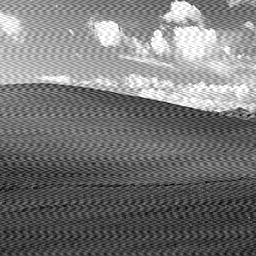

In [ ]:
print(f"I1 noisy image:\n")
display(array_to_image(I1))

I2 noisy image:



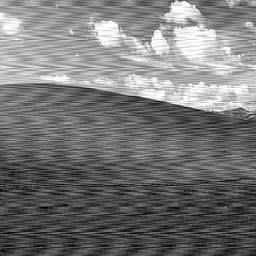

In [ ]:
print(f"I2 noisy image:\n")
display(array_to_image(I2))

I12 noisy image:



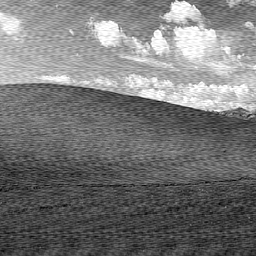

In [ ]:
print(f"I12 noisy image:\n")
array_to_image(I12)

## DFT Implementation

In [ ]:
def dft_matrix(n):
  i, j = np.mgrid[:n, :n]
  return np.power(np.ones((n, n)) * np.exp(-2 * np.pi * complex(0, 1) / n), np.multiply(i, j)) / np.sqrt(n)

In [ ]:
def dft(array):
  return np.matmul(dft_matrix(N), array.T).T

In [ ]:
def dft_inv(array):
  return np.matmul(dft_matrix(N).conjugate(), array.T).T

In order to visualize the complex-valued DFT result, we write a function to display a complex-valued array as an image using the HSV colorspace.

In [ ]:
def complex_array_to_image(array, resize = None):
  """Utility function for printing a complex array as an image."""
  h = np.clip((np.angle(array) + np.pi) / (2 * np.pi) * 256, 1, 255).astype(np.uint8)
  s = (np.ones((N, N)) * 255).astype(np.uint8)
  v = np.clip(np.abs(array) * 256, 1, 255).astype(np.uint8)
  image = Image.fromarray(np.stack((h, s, v), axis=2), mode="HSV").convert("RGB")
  return image.resize((resize, resize), resample=0) if resize else image

Original image DFT visualized:



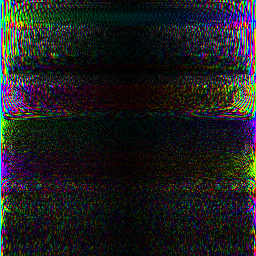

In [ ]:
print(f"Original image DFT visualized:\n")
complex_array_to_image(dft(array) * 8)

Notice that just like in theory, the DFT of I1 and I2 both match the original image and differ in only two columns. For I1, rows $j = nf_1 = 32$ and $j = n(1-f_1) = 224$ differ, while for I2, rows $j = nf_2 = 8$ and $j = n(1-f_2) = 248$ differ. For the joint image I12, all four rows differ from the DFT of the original image.



I1 image DFT visualized:



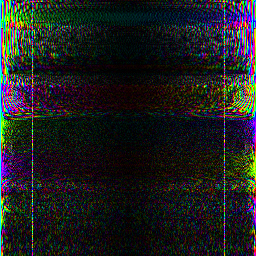

In [ ]:
print(f"\nI1 image DFT visualized:\n")
complex_array_to_image(dft(I1) * 8)


I2 image DFT visualized:



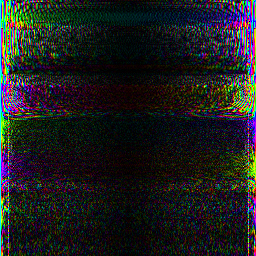

In [ ]:
print(f"\nI2 image DFT visualized:\n")
complex_array_to_image(dft(I2) * 8)


I12 image DFT visualized:



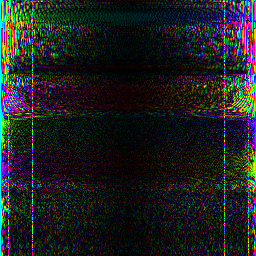

In [ ]:
print(f"\nI12 image DFT visualized:\n")
complex_array_to_image(dft(I12) * 8)

## Image Reconstructions

We reconstruct the images by removing (zeroing out) the affected columns of the DFT and applying the inverse DFT.

In [ ]:
def mask(n, vals):
  """Returns identity matrix of size n with vals removed."""
  d = np.ones((n))
  for i in vals:
    d[i] = 0
  return np.diag(d)


I1 Reconstructed image:  				 Original image:



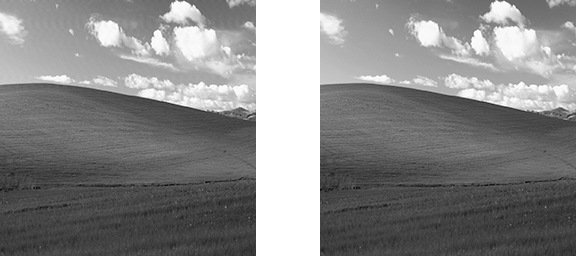


Mean square error: 1.4656394818121972e-05


In [ ]:
reconst_I1 = np.abs(dft_inv(dft(I1) @ mask(N, [int(N * f1), N - int(N * f1)])))
print(f"\nI1 Reconstructed image:  \t\t\t\t Original image:\n")
display(tile_images(images = (array_to_image(reconst_I1), image), columns = 2))
error_I1 = np.square(np.abs(reconst_I1 - array)).sum() / (N * N)
print(f"\nMean square error: {error_I1}")


I2 Reconstructed image:  				 Original image:



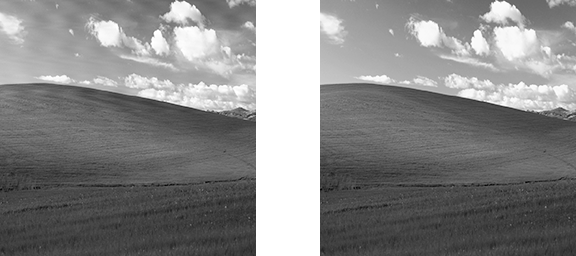


Mean square error: 0.00014890465843853687


In [ ]:
reconst_I2 = np.abs(dft_inv(dft(I2) @ mask(N, [int(N * f2), N - int(N * f2)])))
print(f"\nI2 Reconstructed image:  \t\t\t\t Original image:\n")
display(tile_images(images = (array_to_image(reconst_I2), image), columns = 2))
error_I2 = np.square(np.abs(reconst_I2 - array)).sum() / (N * N)
print(f"\nMean square error: {error_I2}")


I12 Reconstructed image: 				 Original image:



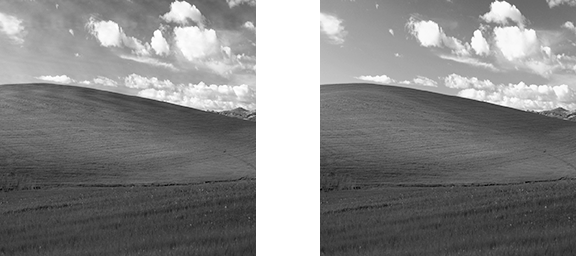


Mean square error: 0.000163561053256659


In [ ]:
reconst_I12 = np.abs(dft_inv(dft(I12) @ mask(N, [int(N * f1), N - int(N * f1), int(N * f2), N - int(N * f2)])))
print(f"\nI12 Reconstructed image: \t\t\t\t Original image:\n")
display(tile_images(images = (array_to_image(reconst_I12), image), columns = 2))
error_I12 = np.square(np.abs(reconst_I12 - array)).sum() / (N * N)
print(f"\nMean square error: {error_I12}")

While the reconstructed images manage to remove most of the noise, there is still some residual effect due to the fact that we removed an entire frequency from the image. It can be seen most prominently in the top-left corner of the image where there is not much high-frequency noise, but there is a low-frequency gradient that is affected by the reconstruction.

A better method of reconstructing the image would involve trying to deduce the original values of the DFT as opposed to removing them completely. However, this is beyond the scope of this assignment.